<a href="https://colab.research.google.com/github/JaanviSaxena/distillation-streamlit/blob/main/Distllation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# mount on drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read the excel sheet
df = pd.read_excel('/content/dataset_distill.xlsx')

In [4]:
df.head()

,Pressure,T1,T2,T3,T4,T5,T6,T7,T8,T9,...,T11,T12,T13,T14,L,V,D,B,F,Ethanol concentration
0,1.01,350.89,350.95,351.01,351.08,351.16,351.26,351.38,351.54,351.78,...,353.00,355.19,363.77,371.47,780,1040,260,340,600,0.82076
1,1.01,350.86,350.91,350.96,351.02,351.09,351.17,351.28,351.43,351.66,...,352.76,354.66,362.20,370.98,780,1040,260,340,600,0.83253
2,1.01,350.85,350.89,350.93,350.99,351.05,351.13,351.23,351.37,351.58,...,352.55,354.13,360.16,370.10,780,1040,260,340,600,0.83953
3,1.01,350.84,350.88,350.92,350.97,351.03,351.11,351.21,351.34,351.53,...,352.40,353.75,358.45,368.99,780,1040,260,340,600,0.84366
4,1.01,350.83,350.87,350.91,350.96,351.02,351.09,351.18,351.31,351.49,...,352.30,353.50,357.23,367.81,780,1040,260,340,600,0.84622


In [5]:
df.describe()

,Pressure,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,D,B,F,Ethanol concentration
count,4.408000e+03,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000
mean,1.010000e+00,351.029049,351.409363,352.066202,352.828578,353.910204,355.214270,356.453975,357.539902,358.484004,359.301298,360.048650,360.884025,364.367117,367.717250,251.823956,293.411978,545.235935,0.792205
std,1.141439e-13,0.334105,1.125225,2.671189,3.788418,4.986453,6.251028,7.119853,7.620257,7.882159,7.979290,7.899189,7.604026,8.563034,6.639423,71.048000,108.550994,119.192840,0.076441
min,1.010000e+00,350.760000,350.770000,350.770000,350.790000,350.800000,350.820000,350.860000,350.910000,351.000000,351.160000,351.500000,352.430000,353.150000,354.520000,150.000000,90.000000,350.000000,0.538190
25%,1.010000e+00,350.820000,350.860000,350.900000,350.950000,351.000000,351.070000,351.160000,351.280000,351.440000,351.720000,352.220000,353.320000,354.750000,362.920000,150.000000,200.000000,350.000000,0.761890
50%,1.010000e+00,350.900000,350.990000,351.100000,351.260000,351.475000,351.840000,352.370000,352.930000,353.740000,354.600000,356.785000,361.470000,370.745000,372.810000,260.000000,320.000000,600.000000,0.817520
75%,1.010000e+00,351.080000,351.390000,351.822500,352.410000,353.740000,356.867500,361.640000,364.750000,366.880000,367.420000,367.522500,367.910000,372.440000,373.010000,260.000000,352.500000,600.000000,0.850280
max,1.010000e+00,352.320000,356.030000,364.970000,368.600000,369.060000,372.570000,372.970000,373.010000,373.010000,373.010000,373.010000,373.010000,373.060000,373.070000,350.000000,450.000000,650.000000,0.891760


Data Pre-Processing

In [6]:
# Checking for null values
df.isnull().sum()

,0
Pressure,0
T1,0
T2,0
T3,0
T4,0
T5,0
T6,0
T7,0
T8,0
T9,0


In [7]:
#checking for duplicate values in each column
df.duplicated().sum()

np.int64(647)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4408 entries, 0 to 4407
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Pressure               4408 non-null   float64
 1   T1                     4408 non-null   float64
 2   T2                     4408 non-null   float64
 3   T3                     4408 non-null   float64
 4   T4                     4408 non-null   float64
 5   T5                     4408 non-null   float64
 6   T6                     4408 non-null   float64
 7   T7                     4408 non-null   float64
 8   T8                     4408 non-null   float64
 9   T9                     4408 non-null   float64
 10  T10                    4408 non-null   float64
 11  T11                    4408 non-null   float64
 12  T12                    4408 non-null   float64
 13  T13                    4408 non-null   float64
 14  T14                    4408 non-null   float64
 15  L   

In [9]:
#convert L and V to numerical value from object
df['L'] = pd.to_numeric(df['L'], errors='coerce')
df['V'] = pd.to_numeric(df['V'], errors='coerce')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4408 entries, 0 to 4407
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Pressure               4408 non-null   float64
 1   T1                     4408 non-null   float64
 2   T2                     4408 non-null   float64
 3   T3                     4408 non-null   float64
 4   T4                     4408 non-null   float64
 5   T5                     4408 non-null   float64
 6   T6                     4408 non-null   float64
 7   T7                     4408 non-null   float64
 8   T8                     4408 non-null   float64
 9   T9                     4408 non-null   float64
 10  T10                    4408 non-null   float64
 11  T11                    4408 non-null   float64
 12  T12                    4408 non-null   float64
 13  T13                    4408 non-null   float64
 14  T14                    4408 non-null   float64
 15  L   

In [11]:
df.isnull().sum()

,0
Pressure,0
T1,0
T2,0
T3,0
T4,0
T5,0
T6,0
T7,0
T8,0
T9,0


In [12]:
# fill the missing values of the L and V with meadian
df['L'].fillna(df['L'].median(), inplace=True)
df['V'].fillna(df['V'].median(), inplace=True)

<ipython-input-12-2596195486>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['L'].fillna(df['L'].median(), inplace=True)
<ipython-input-12-2596195486>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

In [13]:
df.isnull().sum()

,0
Pressure,0
T1,0
T2,0
T3,0
T4,0
T5,0
T6,0
T7,0
T8,0
T9,0


In [14]:
# Checking outliers by z square
from scipy import stats
z = np.abs(stats.zscore(df['Ethanol concentration']))
threshold = 3
print(np.where(z > 3))

(array([1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944,
       1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
       1956, 1968, 1980, 1999, 2000, 2001, 2002, 2003, 2004, 2045, 2046,
       2047, 2048, 2088, 2089, 2090, 2091, 2092, 2104, 2105, 2106, 2107,
       2108, 2120, 2121, 2122, 2123, 2124, 2125, 2126, 2127, 2128, 2212,
       2213, 2214, 2215, 2216, 2217, 2218, 2219, 2220, 2221, 2222, 2223,
       2224, 2252, 2253, 2254, 2255, 2256, 2286, 2287, 2288, 2319, 2320,
       2321, 2322, 2323, 2324, 2325, 2326, 2327, 2328, 2329, 2330, 2331,
       2332, 2333, 2334, 2335, 2336, 2337, 2338, 2339, 2340, 2341, 2353,
       2365, 2383, 2384, 2385, 2386, 2387, 2388, 2389, 2429, 2430, 2431,
       2432, 2433, 2474, 2475, 2476, 2477, 2489, 2490, 2491, 2492, 2493,
       2505, 2506, 2507, 2508, 2509, 2510, 2511, 2512, 2513, 2597, 2598,
       2599, 2600, 2601, 2602, 2603, 2604, 2605, 2606, 2607, 2608, 2609,
       2637, 2638, 2639, 2640, 2641, 2671, 2672, 2

In [15]:
# checking skewness in data
df.skew()

,0
Pressure,0.000000
T1,2.492693
T2,3.072963
T3,3.372123
T4,2.757204
T5,1.929362
T6,1.453837
T7,1.103980
T8,0.833737
T9,0.620700


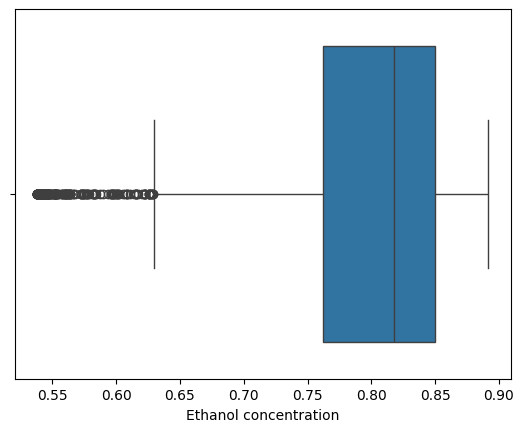

In [16]:
sns.boxplot(x=df['Ethanol concentration'])
plt.show()

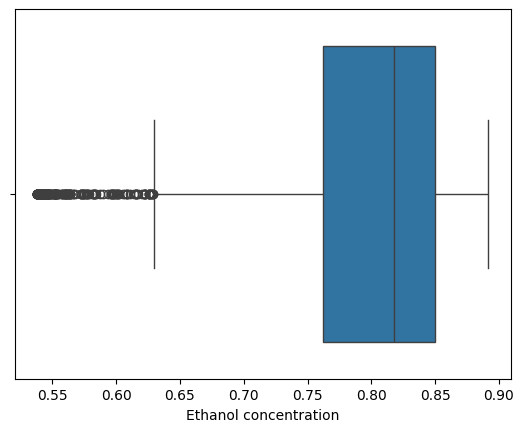

In [17]:
sns.boxplot(x=df['Ethanol concentration'])
plt.show()

In [18]:
from scipy.stats import skew

skewness_value = skew(df)
print("Skewness:", skewness_value)

Skewness: [        nan  2.49184485  3.07191679  3.37097556  2.75626601  1.92870519
  1.45334269  1.10360389  0.83345309  0.62048905  0.46132817  0.34043766
  0.23701492 -0.23282182 -0.786539    3.45308237  3.44573597 -0.16423631
 -0.4658033  -0.9613201  -1.70699501]


<ipython-input-18-430479869>:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness_value = skew(df)


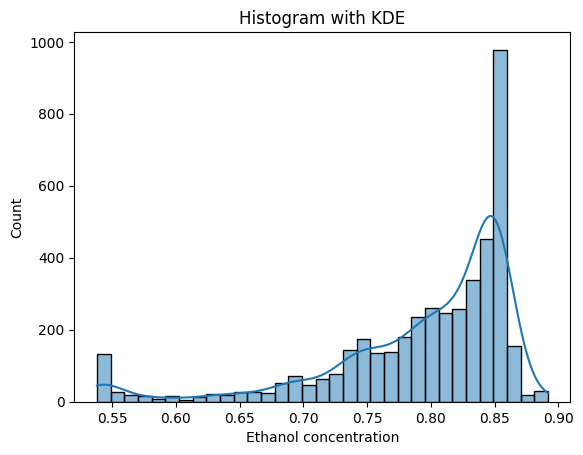

In [19]:
sns.histplot(df['Ethanol concentration'], kde=True)  # KDE gives you a smooth curve
plt.title("Histogram with KDE")
plt.show()

In [20]:
df.head()

,Pressure,T1,T2,T3,T4,T5,T6,T7,T8,T9,...,T11,T12,T13,T14,L,V,D,B,F,Ethanol concentration
0,1.01,350.89,350.95,351.01,351.08,351.16,351.26,351.38,351.54,351.78,...,353.00,355.19,363.77,371.47,780.0,1040.0,260,340,600,0.82076
1,1.01,350.86,350.91,350.96,351.02,351.09,351.17,351.28,351.43,351.66,...,352.76,354.66,362.20,370.98,780.0,1040.0,260,340,600,0.83253
2,1.01,350.85,350.89,350.93,350.99,351.05,351.13,351.23,351.37,351.58,...,352.55,354.13,360.16,370.10,780.0,1040.0,260,340,600,0.83953
3,1.01,350.84,350.88,350.92,350.97,351.03,351.11,351.21,351.34,351.53,...,352.40,353.75,358.45,368.99,780.0,1040.0,260,340,600,0.84366
4,1.01,350.83,350.87,350.91,350.96,351.02,351.09,351.18,351.31,351.49,...,352.30,353.50,357.23,367.81,780.0,1040.0,260,340,600,0.84622


In [21]:
# CAPPING OUTLIERS IN ETHANOL CONCENTRATION USING IQR METHOD

# Step 1: Calculate IQR for 'Ethanol concentration'
Q1 = df["Ethanol concentration"].quantile(0.25)
Q3 = df["Ethanol concentration"].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define acceptable range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Cap the outliers instead of removing
df["Ethanol concentration"] = df["Ethanol concentration"].clip(lower=lower_bound, upper=upper_bound)

In [22]:
# Step 1: Select only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Step 2: Initialize a dictionary to store outlier counts
outlier_summary = {}

# Step 3: Loop through each numeric column and detect outliers using IQR
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count the number of outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = outliers.shape[0]

# Step 4: Display outlier counts for each column
outlier_summary = pd.DataFrame(list(outlier_summary.items()), columns=['Column', 'Outlier_Count'])
outlier_summary.sort_values(by="Outlier_Count", ascending=False)

,Column,Outlier_Count
5,T5,715
4,T4,623
6,T6,539
3,T3,498
2,T2,426
1,T1,354
15,L,293
16,V,293
0,Pressure,0
9,T9,0


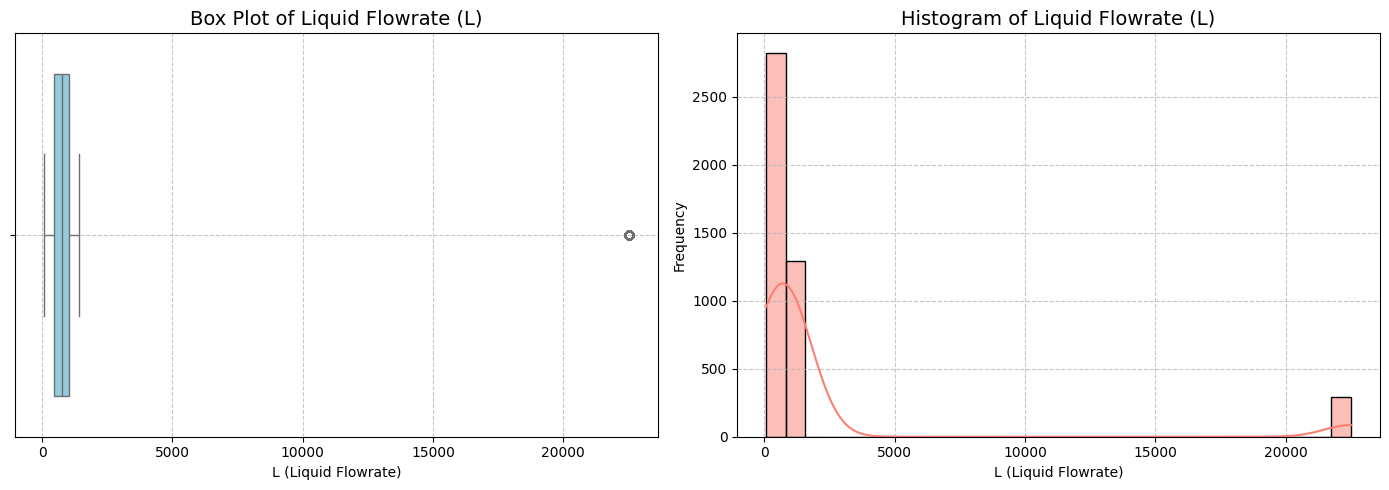

In [23]:
# PLOTTING LIQUID FLOWRATE (L)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot for L
sns.boxplot(x=df["L"], color="skyblue", ax=axes[0])
axes[0].set_title("Box Plot of Liquid Flowrate (L)", fontsize=14)
axes[0].set_xlabel("L (Liquid Flowrate)")
axes[0].grid(True, linestyle='--', alpha=0.7)

# Histogram for L
sns.histplot(df["L"], bins=30, kde=True, color="salmon", ax=axes[1])
axes[1].set_title("Histogram of Liquid Flowrate (L)", fontsize=14)
axes[1].set_xlabel("L (Liquid Flowrate)")
axes[1].set_ylabel("Frequency")
axes[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [24]:
# CAPPING L USING IQR METHOD

# Calculate IQR
Q1 = df["L"].quantile(0.25)
Q3 = df["L"].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers
df["L"] = df["L"].clip(lower=lower_bound, upper=upper_bound)

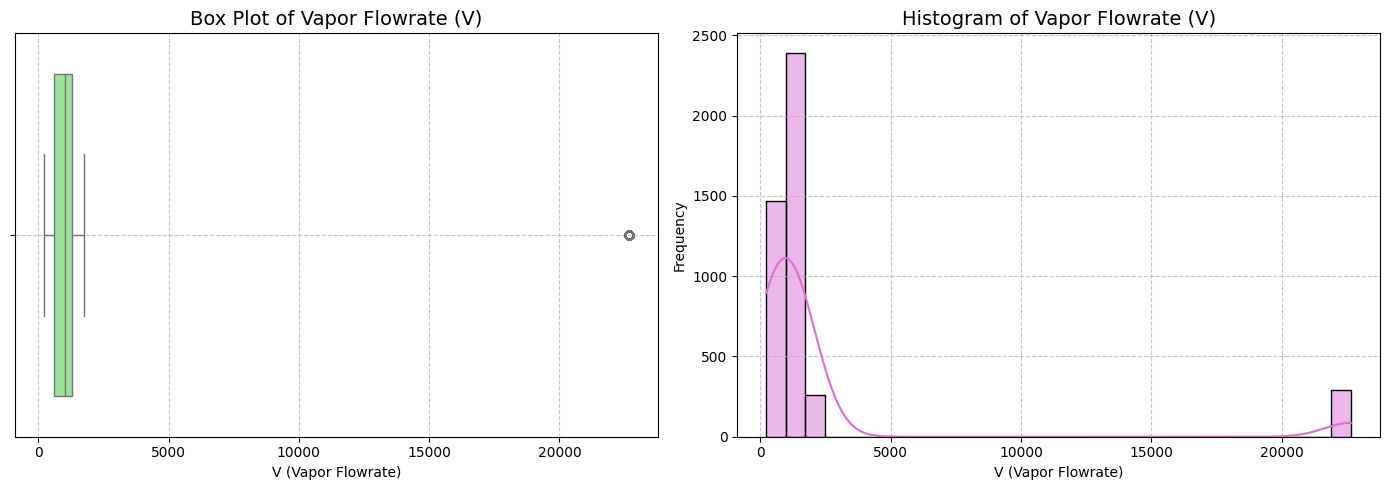

In [ ]:
# PLOTTING VAPOR FLOWRATE (V)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot for V
sns.boxplot(x=df["V"], color="lightgreen", ax=axes[0])
axes[0].set_title("Box Plot of Vapor Flowrate (V)", fontsize=14)
axes[0].set_xlabel("V (Vapor Flowrate)")
axes[0].grid(True, linestyle='--', alpha=0.7)

# Histogram for V
sns.histplot(df["V"], bins=30, kde=True, color="orchid", ax=axes[1])
axes[1].set_title("Histogram of Vapor Flowrate (V)", fontsize=14)
axes[1].set_xlabel("V (Vapor Flowrate)")
axes[1].set_ylabel("Frequency")
axes[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [25]:
# USING IQR METHOD TO CAP V

# Step 1: Calculate IQR for V
Q1 = df["V"].quantile(0.25)
Q3 = df["V"].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Cap the outliers in V
df["V"] = df["V"].clip(lower=lower_bound, upper=upper_bound)

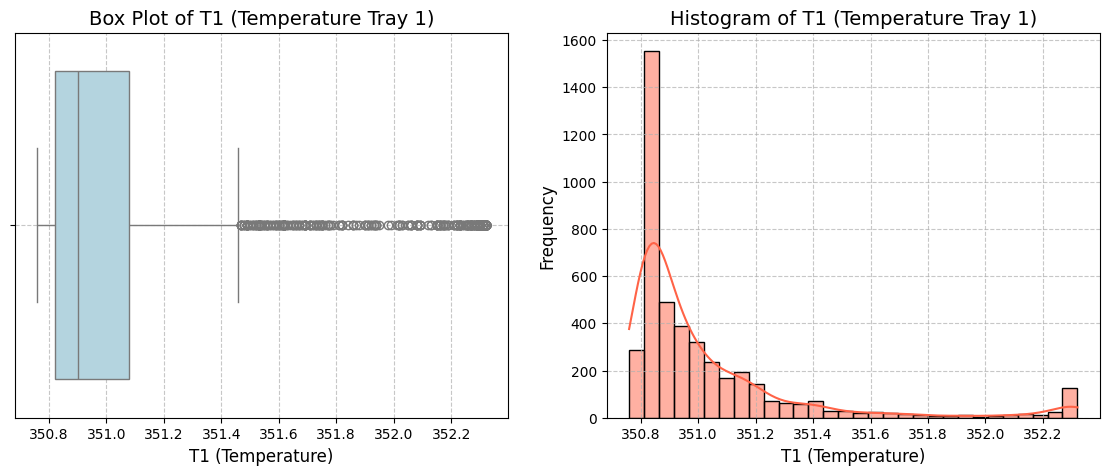

In [26]:
# PLOTTING T1 TEMP.

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Step 1: Boxplot for T1
sns.boxplot(x=df["T1"], color="lightblue", ax=axes[0])
axes[0].set_title("Box Plot of T1 (Temperature Tray 1)", fontsize=14)
axes[0].set_xlabel("T1 (Temperature)", fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.7)

# Step 2: Histogram for T1
sns.histplot(df["T1"], bins=30, kde=True, color="tomato", ax=axes[1])
axes[1].set_title("Histogram of T1 (Temperature Tray 1)", fontsize=14)
axes[1].set_xlabel("T1 (Temperature)", fontsize=12)
axes[1].set_ylabel("Frequency", fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.7)

In [27]:
# USING IQR TO CAP THE OUTLIERS

# Step 1: Calculate IQR for T1
Q1 = df["T1"].quantile(0.25)
Q3 = df["T1"].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define acceptable range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Cap the outliers
df["T1"] = df["T1"].clip(lower=lower_bound, upper=upper_bound)

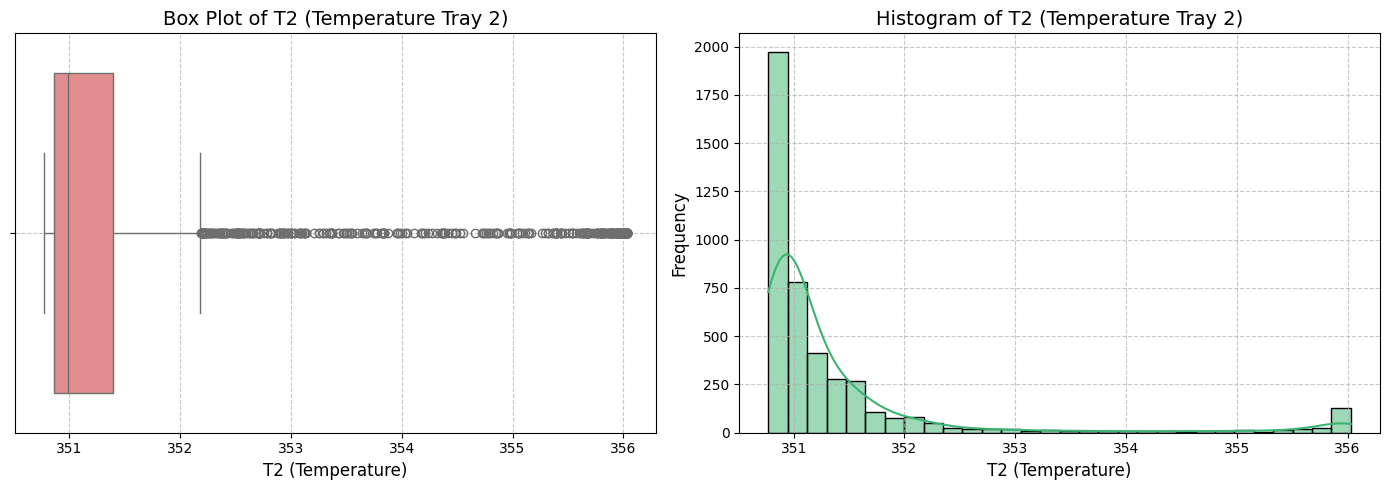

In [28]:
# PLOTTING T2 TEMP.

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Step 1: Boxplot for T2
sns.boxplot(x=df["T2"], color="lightcoral", ax=axes[0])
axes[0].set_title("Box Plot of T2 (Temperature Tray 2)", fontsize=14)
axes[0].set_xlabel("T2 (Temperature)", fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.7)

# Step 2: Histogram for T2
sns.histplot(df["T2"], bins=30, kde=True, color="mediumseagreen", ax=axes[1])
axes[1].set_title("Histogram of T2 (Temperature Tray 2)", fontsize=14)
axes[1].set_xlabel("T2 (Temperature)", fontsize=12)
axes[1].set_ylabel("Frequency", fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.7)

# Step 3: Adjust layout
plt.tight_layout()
plt.show()

In [29]:
# USING IQR TO CAP THE OUTLIERS

# Step 1: Calculate IQR for T2
Q1 = df["T2"].quantile(0.25)
Q3 = df["T2"].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define acceptable range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Cap the outliers
df["T2"] = df["T2"].clip(lower=lower_bound, upper=upper_bound)


In [30]:
# CAPPING TEMP T3, T4, T5, T6

# Define the list of temperature columns
temp_columns = ["T3", "T4", "T5", "T6"]

# Apply IQR capping for each temperature column
for col in temp_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    print(f"Capped outliers in {col}")

Capped outliers in T3
Capped outliers in T4
Capped outliers in T5
Capped outliers in T6


In [31]:
# Step 1: Select only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Step 2: Initialize a dictionary to store outlier counts
outlier_summary = {}

# Step 3: Loop through each numeric column and detect outliers using IQR
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count the number of outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = outliers.shape[0]

# Step 4: Display outlier counts for each column
outlier_summary = pd.DataFrame(list(outlier_summary.items()), columns=['Column', 'Outlier_Count'])
outlier_summary.sort_values(by="Outlier_Count", ascending=False)

,Column,Outlier_Count
0,Pressure,0
1,T1,0
2,T2,0
3,T3,0
4,T4,0
5,T5,0
6,T6,0
7,T7,0
8,T8,0
9,T9,0


Feature Extraction

In [32]:
#Feature 1 - Energy Consumption

df["Energy_Consumption"] = (df["T14"] - df["T1"]) * df["V"]

In [33]:
#Feature 2 - yield

df["Yield"] = df["D"] * df["Ethanol concentration"] / df["F"]

In [34]:
#Feature 3 - Waste Generation

df["Waste_Generated"] = df["B"] * (1 - df["Ethanol concentration"])  # Approximate non-ethanol content in bottoms

In [35]:
df.head()

,Pressure,T1,T2,T3,T4,T5,T6,T7,T8,T9,...,T14,L,V,D,B,F,Ethanol concentration,Energy_Consumption,Yield,Waste_Generated
0,1.01,350.89,350.95,351.01,351.08,351.16,351.26,351.38,351.54,351.78,...,371.47,780.0,1040.0,260,340,600,0.82076,21403.2,0.355663,60.9416
1,1.01,350.86,350.91,350.96,351.02,351.09,351.17,351.28,351.43,351.66,...,370.98,780.0,1040.0,260,340,600,0.83253,20924.8,0.360763,56.9398
2,1.01,350.85,350.89,350.93,350.99,351.05,351.13,351.23,351.37,351.58,...,370.10,780.0,1040.0,260,340,600,0.83953,20020.0,0.363796,54.5598
3,1.01,350.84,350.88,350.92,350.97,351.03,351.11,351.21,351.34,351.53,...,368.99,780.0,1040.0,260,340,600,0.84366,18876.0,0.365586,53.1556
4,1.01,350.83,350.87,350.91,350.96,351.02,351.09,351.18,351.31,351.49,...,367.81,780.0,1040.0,260,340,600,0.84622,17659.2,0.366695,52.2852


Visualizing Graphs

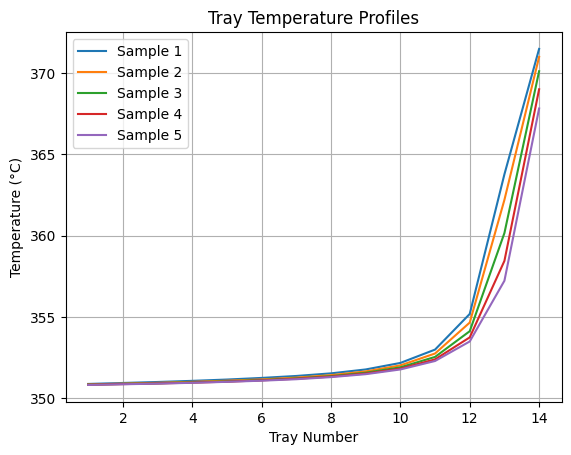

In [36]:
# Tray Temperature Profile

import matplotlib.pyplot as plt

for i in range(5):  # plot for first 5 samples
    plt.plot(range(1, 15), df.iloc[i][[f"T{j}" for j in range(1, 15)]], label=f'Sample {i+1}')
plt.xlabel("Tray Number")
plt.ylabel("Temperature (°C)")
plt.title("Tray Temperature Profiles")
plt.legend()
plt.grid(True)
plt.show()

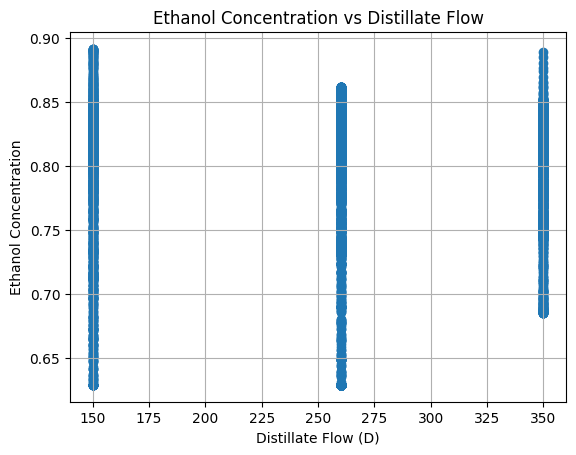

In [37]:
#Ethanol Concentration vs Distillate Flow

plt.scatter(df["D"], df["Ethanol concentration"])
plt.xlabel("Distillate Flow (D)")
plt.ylabel("Ethanol Concentration")
plt.title("Ethanol Concentration vs Distillate Flow")
plt.grid(True)
plt.show()

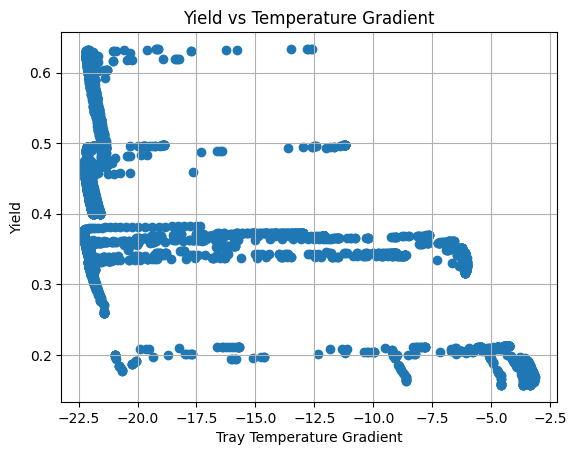

In [38]:
#Temperature Gradient vs Yield

# Calculate Tray Temperature Gradient (e.g., difference between top and bottom tray temperatures)
df["Tray_Temp_Gradient"] = df["T1"] - df["T14"]  # Example calculation

#Temperature Gradient vs Yield
plt.scatter(df["Tray_Temp_Gradient"], df["Yield"])
plt.xlabel("Tray Temperature Gradient")
plt.ylabel("Yield")
plt.title("Yield vs Temperature Gradient")
plt.grid(True)
plt.show()

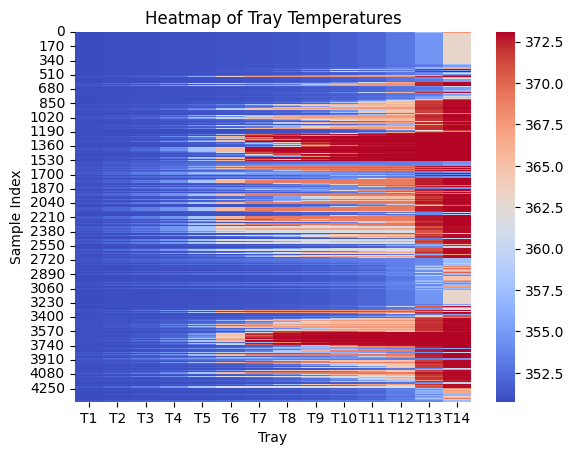

In [39]:
#Heat Map of Tray Temperature

import seaborn as sns
sns.heatmap(df[[f"T{i}" for i in range(1, 15)]], cmap="coolwarm")
plt.title("Heatmap of Tray Temperatures")
plt.xlabel("Tray")
plt.ylabel("Sample Index")
plt.show()

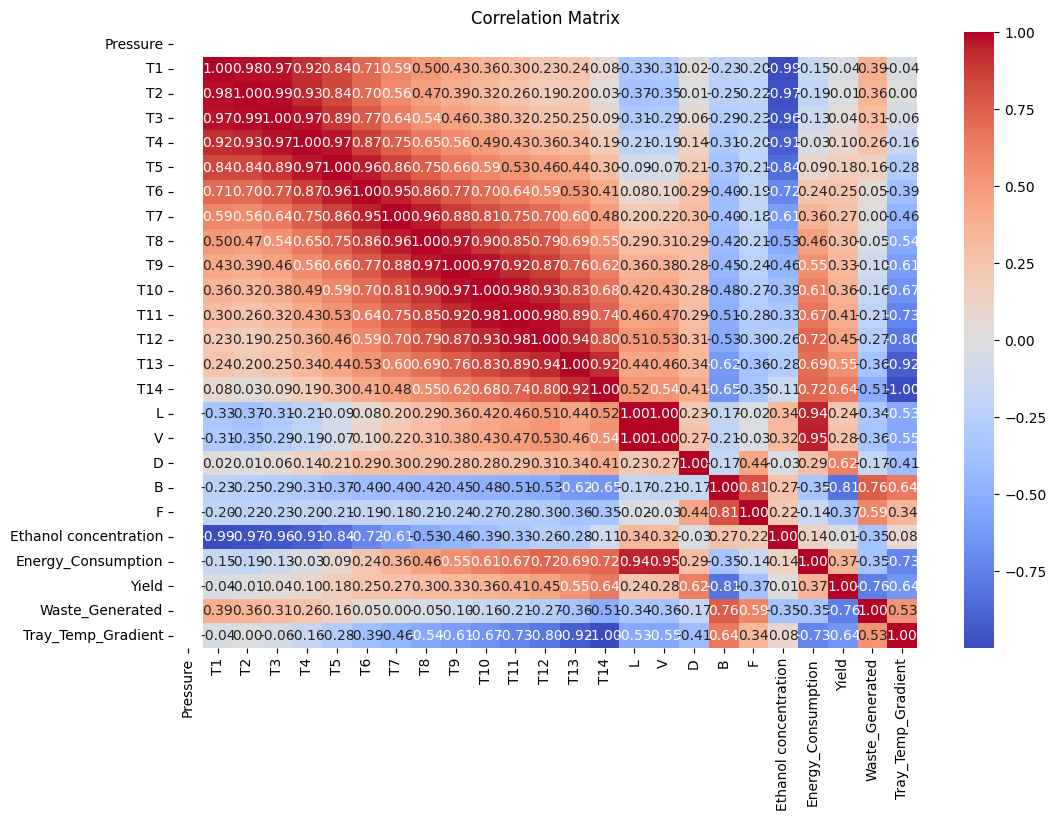

In [40]:
#Correlation Matrix

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

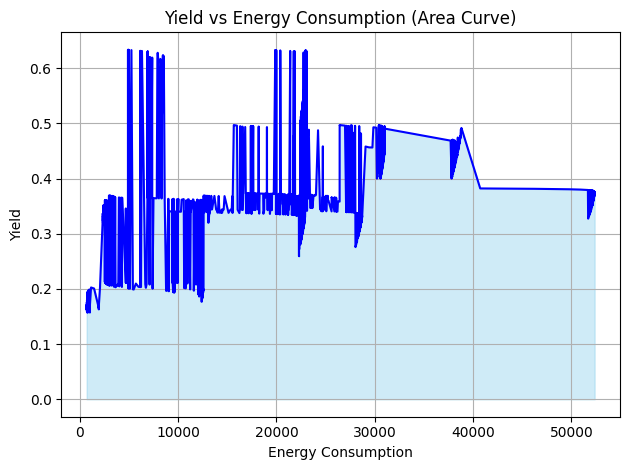

In [41]:
# Yield vs Energy Consumption

import matplotlib.pyplot as plt

# Sort the data by Energy Consumption for a smooth area plot
df_sorted = df.sort_values("Energy_Consumption")

# Plot area under the Yield curve
plt.fill_between(df_sorted["Energy_Consumption"], df_sorted["Yield"], color='skyblue', alpha=0.4)
plt.plot(df_sorted["Energy_Consumption"], df_sorted["Yield"], color='blue')  # Optional: Line on top
plt.title("Yield vs Energy Consumption (Area Curve)")
plt.xlabel("Energy Consumption")
plt.ylabel("Yield")
plt.grid(True)
plt.tight_layout()
plt.show()


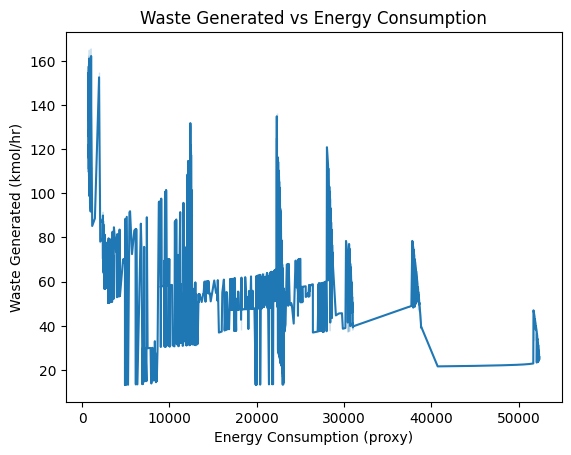

In [42]:
#Waste Generated vs Energy Consumption

sns.lineplot(x="Energy_Consumption", y="Waste_Generated", data=df)
plt.title("Waste Generated vs Energy Consumption")
plt.xlabel("Energy Consumption (proxy)")
plt.ylabel("Waste Generated (kmol/hr)")
plt.show()

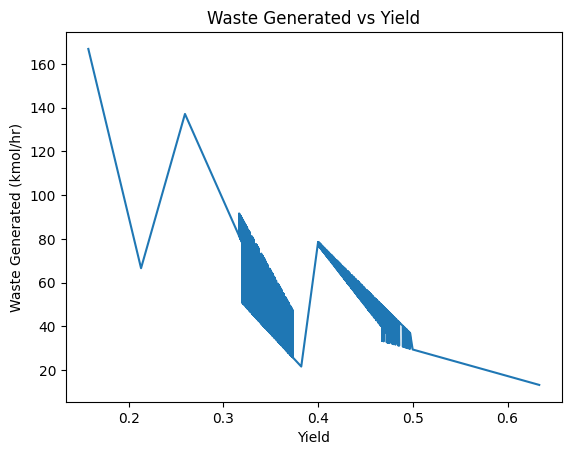

In [43]:
#Waste Generation vs Yield

sns.lineplot(x="Yield", y="Waste_Generated", data=df)
plt.title("Waste Generated vs Yield")
plt.xlabel("Yield")
plt.ylabel("Waste Generated (kmol/hr)")
plt.show()

Training the model

📈 Ethanol concentration
  RMSE        : 0.0567
  MAE         : 0.0459
  R² Score    : 0.2529
📈 Yield
  RMSE        : 0.0306
  MAE         : 0.0235
  R² Score    : 0.9075
📈 Waste_Generated
  RMSE        : 16.6017
  MAE         : 12.7230
  R² Score    : 0.6441
📈 Energy_Consumption
  RMSE        : 0.0000
  MAE         : 0.0000
  R² Score    : 1.0000


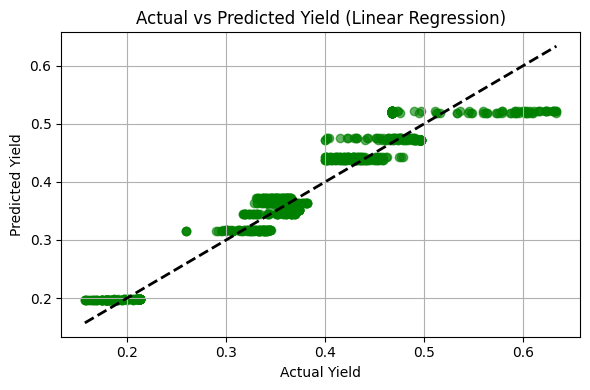

In [44]:
# Multvariate Linear Regression Model

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Step 1: Clean and preprocess the data
for col in ["F", "D", "B", "L", "V", "Ethanol concentration"]:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(",", ""), errors='coerce')

# Step 2: Feature engineering
df["Yield"] = df["D"] * df["Ethanol concentration"] / df["F"]
df["Waste_Generated"] = df["B"] * (1 - df["Ethanol concentration"])
df["Energy_Consumption"] = df["V"]

# Drop rows with missing values
df_model = df.dropna(subset=["F", "D", "B", "L", "V", "Ethanol concentration", "Yield", "Waste_Generated", "Energy_Consumption"])

# Step 3: Define features and multiple targets
X = df_model[["F", "D", "B", "L", "V"]]
y = df_model[["Ethanol concentration", "Yield", "Waste_Generated", "Energy_Consumption"]]

# Step 4: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Train multivariate Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Step 7: Predict and evaluate each target
y_pred = model.predict(X_test_scaled)
target_names = y.columns
for i, name in enumerate(target_names):
    # Calculate MSE first, then take the square root for RMSE
    mse = mean_squared_error(y_test.iloc[:, i], y_pred[:, i])
    rmse = np.sqrt(mse)  # Calculate RMSE by taking the square root of MSE
    mae = mean_absolute_error(y_test.iloc[:, i], y_pred[:, i]) # Calculate MAE
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])

    # Accuracy calculation is not standard for regression.
    # A common approach for regression "accuracy" is to calculate the percentage of predictions within a certain tolerance.
    # For demonstration, let's assume a simple accuracy calculation (e.g., within 10% of the actual value)
    # You might need to adjust this based on your specific requirements.
    tolerance = 0.1 * y_test.iloc[:, i].std() # Example tolerance based on std deviation
    correct_predictions = np.sum(np.abs(y_test.iloc[:, i] - y_pred[:, i]) <= tolerance)
    accuracy = correct_predictions / len(y_test)

    print(f"📈 {name}")
    print(f"  RMSE        : {rmse:.4f}")
    print(f"  MAE         : {mae:.4f}")
    print(f"  R² Score    : {r2:.4f}")
    # Only print accuracy if you have a meaningful definition for it in your context
    # print(f"  Accuracy(%) : {accuracy * 100:.2f}%") # Uncomment if accuracy is needed

# Optional: Plot one prediction
plt.figure(figsize=(6, 4))
plt.scatter(y_test["Yield"], y_pred[:, 1], alpha=0.6, color='green')
plt.plot([y_test["Yield"].min(), y_test["Yield"].max()],
         [y_test["Yield"].min(), y_test["Yield"].max()],
         'k--', lw=2)
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Actual vs Predicted Yield (Linear Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()


--- Model for: Ethanol concentration ---
MAE:  0.0018
RMSE: 0.0025
R²:   0.9990


<ipython-input-45-2350202975>:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["V"].fillna(df["V"].median(), inplace=True)
<ipython-input-45-2350202975>:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

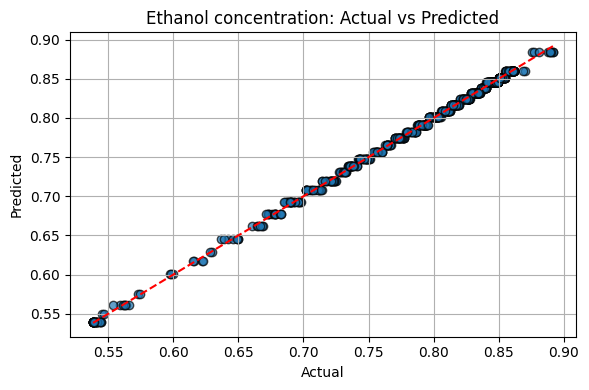


--- Model for: Yield ---
MAE:  0.0064
RMSE: 0.0096
R²:   0.9911


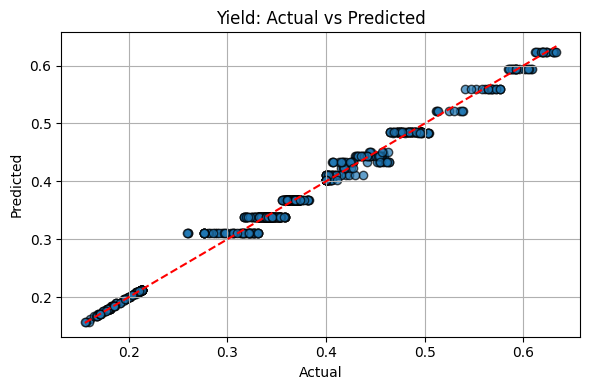


--- Model for: Waste_Generated ---
MAE:  3.4862
RMSE: 6.3938
R²:   0.9887


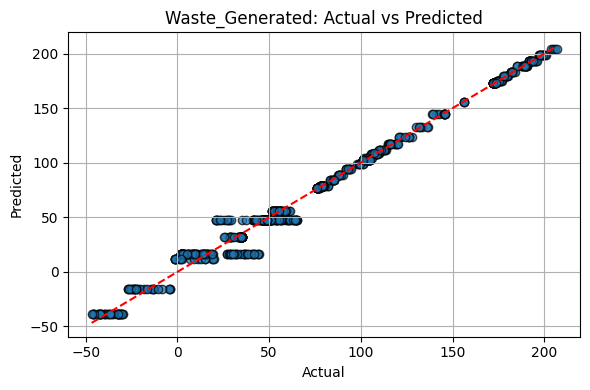


--- Model for: Energy_Consumption ---
MAE:  708.7315
RMSE: 1490.3541
R²:   0.9999


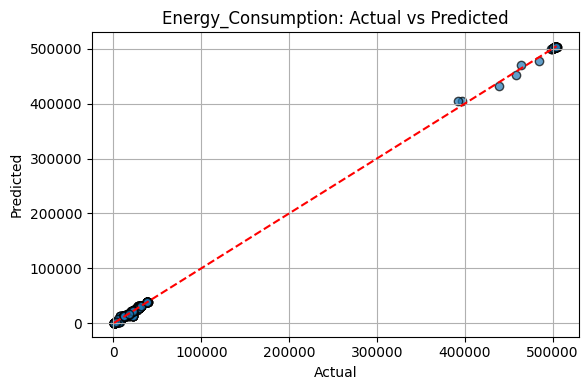

In [45]:
# Multivariate Decision Tree Model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load data
df = pd.read_excel("dataset_distill.xlsx")

# ---- Clean and Preprocess Data (Add this step) ----
# Ensure numerical columns are of the correct type
for col in ["F", "D", "B", "L", "V", "Ethanol concentration", "T1", "T14"]:
    df[col] = pd.to_numeric(df[col], errors='coerce')


# ---- Feature Engineering ----
ethanol_in_feed = 0.5
# Ensure T14, T1, and V are numerical before calculation
df["Energy_Consumption"] = (df["T14"] - df["T1"]) * df["V"]
df["Yield"] = (df["D"] * df["Ethanol concentration"]) / df["F"]
df["Waste_Generated"] = df["F"] * ethanol_in_feed - df["D"] * df["Ethanol concentration"]

# Fill missing values
df["V"].fillna(df["V"].median(), inplace=True)
df["L"].fillna(df["L"].median(), inplace=True)
# Fill missing values for T1 and T14 as well, as they are used in Energy_Consumption
df["T1"].fillna(df["T1"].median(), inplace=True)
df["T14"].fillna(df["T14"].median(), inplace=True)

# Drop rows with missing values in the columns used for features and targets
# This is important after fillna, as some rows might still have NaNs if the entire column was NaN
cols_to_check_for_nan = ["F", "D", "B", "L", "V", "T1", "T14", "Ethanol concentration", "Yield", "Waste_Generated", "Energy_Consumption"]
df.dropna(subset=cols_to_check_for_nan, inplace=True)


# ---- Features and Targets ----
features = ["F", "D", "B", "L", "V", "T1", "T14"]
targets = {
    "Ethanol concentration": "Ethanol concentration",
    "Yield": "Yield",
    "Waste_Generated": "Waste_Generated",
    "Energy_Consumption": "Energy_Consumption"
}

# ---- Train, Predict, and Evaluate each target ----
for name, target in targets.items():
    print(f"\n--- Model for: {name} ---")

    X = df[features]
    y = df[target]

    # Check if y is not empty after dropping NaNs
    if y.empty:
        print(f"Skipping model for {name} as target column is empty after cleaning.")
        continue

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Check if train/test splits are not empty
    if X_train.empty or X_test.empty or y_train.empty or y_test.empty:
         print(f"Skipping model for {name} due to insufficient data after split.")
         continue


    model = DecisionTreeRegressor(max_depth=5, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # --- Evaluation Metrics ---
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"MAE:  {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²:   {r2:.4f}")

    # --- Plot Predictions vs Actual ---
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
    # Ensure plot limits are based on the actual data range
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--')  # Ideal line
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{name}: Actual vs Predicted")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

<ipython-input-46-2647344955>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["T1"].fillna(df["T1"].median(), inplace=True)
<ipython-input-46-2647344955>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 


--- KNN Model for: Ethanol concentration ---
MAE:  0.0010
RMSE: 0.0019
R²:   0.9994


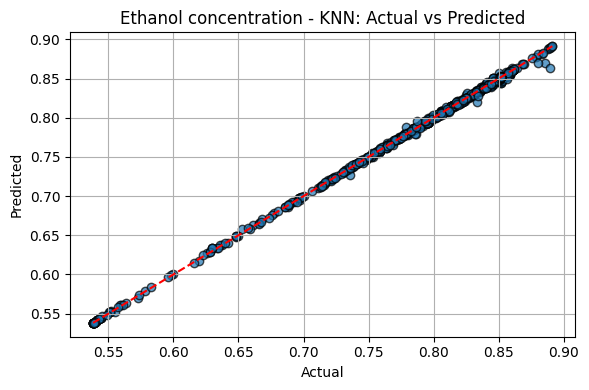


--- KNN Model for: Yield ---
MAE:  0.0005
RMSE: 0.0009
R²:   0.9999


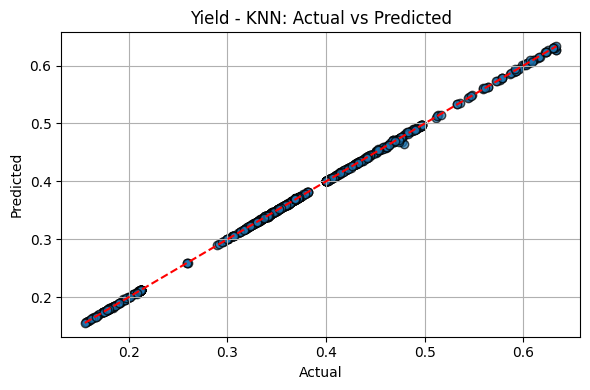


--- KNN Model for: Waste_Generated ---
MAE:  0.2452
RMSE: 0.5419
R²:   0.9999


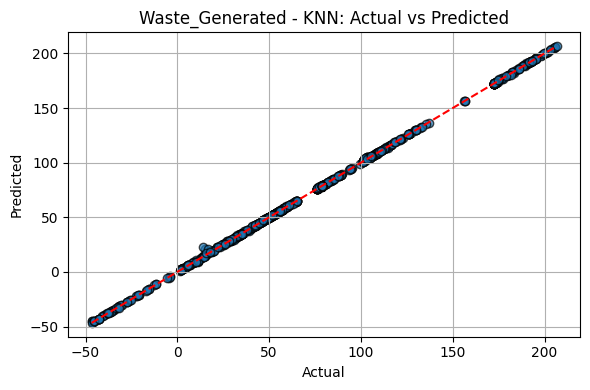


--- KNN Model for: Energy_Consumption ---
MAE:  149.5276
RMSE: 718.3583
R²:   1.0000


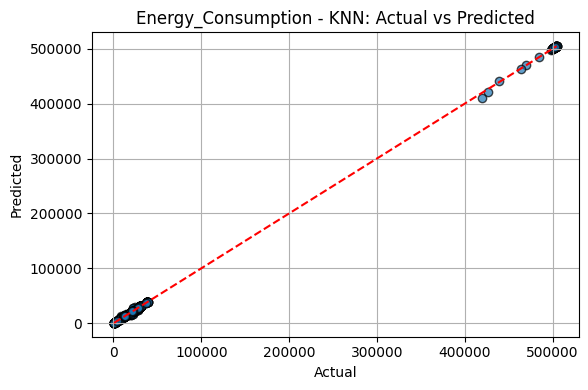

In [46]:
# KNN model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_excel("dataset_distill.xlsx")

# --- Ensure columns are numeric and handle potential errors ---
# Convert relevant columns to numeric, coercing errors to NaN
for col in ["F", "D", "B", "L", "V", "Ethanol concentration", "T1", "T14"]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill missing values after conversion
# Fill missing values for T1, T14, V, L as they are used in feature engineering
df["T1"].fillna(df["T1"].median(), inplace=True)
df["T14"].fillna(df["T14"].median(), inplace=True)
df["V"].fillna(df["V"].median(), inplace=True)
df["L"].fillna(df["L"].median(), inplace=True)

# --- Feature Engineering ---
ethanol_in_feed = 0.5
# Now that T14, T1, and V are numeric and NaNs are handled, the calculation should work
df["Energy_Consumption"] = (df["T14"] - df["T1"]) * df["V"]
df["Yield"] = (df["D"] * df["Ethanol concentration"]) / df["F"]
df["Waste_Generated"] = df["F"] * ethanol_in_feed - df["D"] * df["Ethanol concentration"]

# Drop rows with missing values in the columns used for features and targets
# This is important after fillna, as some rows might still have NaNs if the entire column was NaN
cols_to_check_for_nan = ["F", "D", "B", "L", "V", "T1", "T14", "Ethanol concentration", "Yield", "Waste_Generated", "Energy_Consumption"]
df.dropna(subset=cols_to_check_for_nan, inplace=True)


# ---- Features and Targets ----
features = ["F", "D", "B", "L", "V", "T1", "T14"]
targets = {
    "Ethanol concentration": "Ethanol concentration",
    "Yield": "Yield",
    "Waste_Generated": "Waste_Generated",
    "Energy_Consumption": "Energy_Consumption"
}

# --- Loop over each target to train KNN ---
for name, target in targets.items():
    print(f"\n--- KNN Model for: {name} ---")

    X = df[features]
    y = df[target]

    # Check if y is not empty after dropping NaNs
    if y.empty:
        print(f"Skipping model for {name} as target column is empty after cleaning.")
        continue

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Check if train/test splits are not empty
    if X_train.empty or X_test.empty or y_train.empty or y_test.empty:
         print(f"Skipping model for {name} due to insufficient data after split.")
         continue


    # Feature scaling (important for KNN)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train KNN
    knn = KNeighborsRegressor(n_neighbors=5)  # You can tune this later
    knn.fit(X_train_scaled, y_train)

    # Predict and evaluate
    y_pred = knn.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"MAE:  {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²:   {r2:.4f}")

    # Plot: Actual vs Predicted
    plt.figure(figsize=(6, 4))
    # Ensure plot limits are based on the actual data range
    min_val = min(y_test.min(), y_pred.min()) if not y_test.empty and not y_pred.size == 0 else 0
    max_val = max(y_test.max(), y_pred.max()) if not y_test.empty and not y_pred.size == 0 else 1

    plt.scatter(y_test, y_pred, alpha=0.7, edgecolor='k')
    plt.plot([min_val, max_val], [min_val, max_val], 'r--') # Ideal line
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{name} - KNN: Actual vs Predicted")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

<ipython-input-47-3316085654>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["T1"].fillna(df["T1"].median(), inplace=True)
<ipython-input-47-3316085654>:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 


--- Random Forest Model for: Ethanol concentration ---
MAE:  0.0005
RMSE: 0.0008
R²:   0.9999


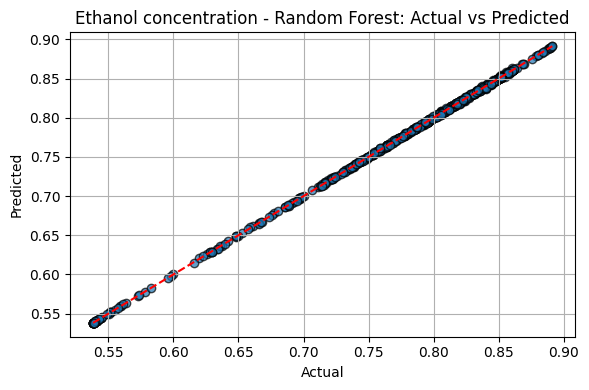

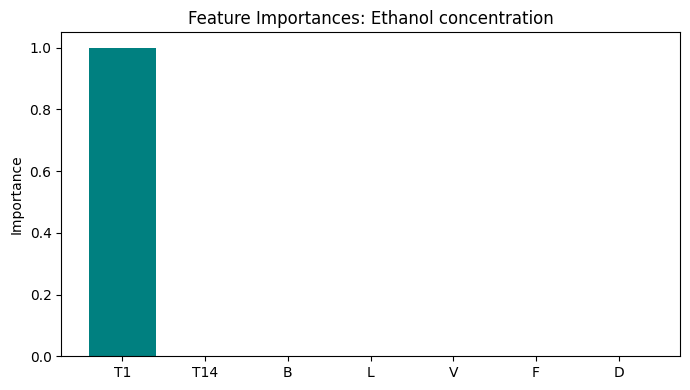


--- Random Forest Model for: Yield ---
MAE:  0.0003
RMSE: 0.0006
R²:   1.0000


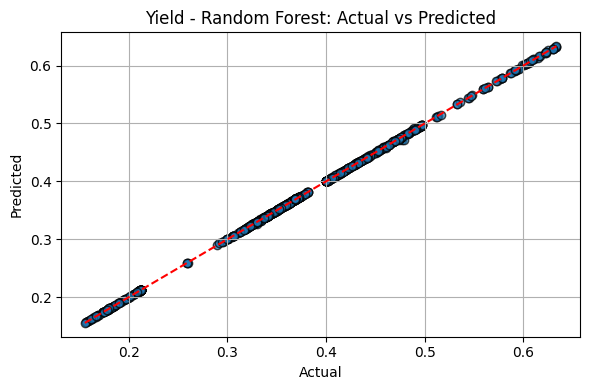

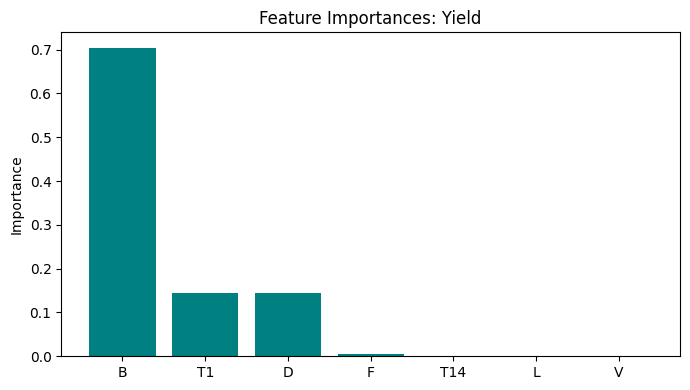


--- Random Forest Model for: Waste_Generated ---
MAE:  0.1447
RMSE: 0.3178
R²:   1.0000


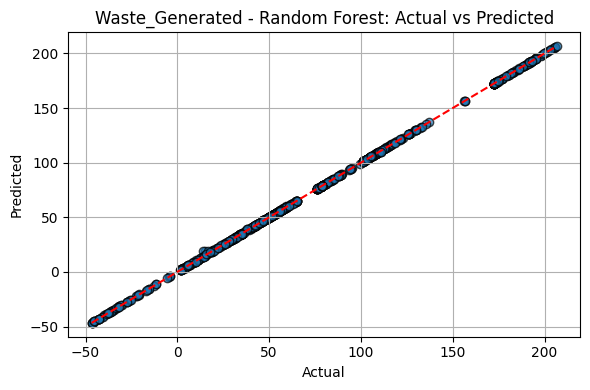

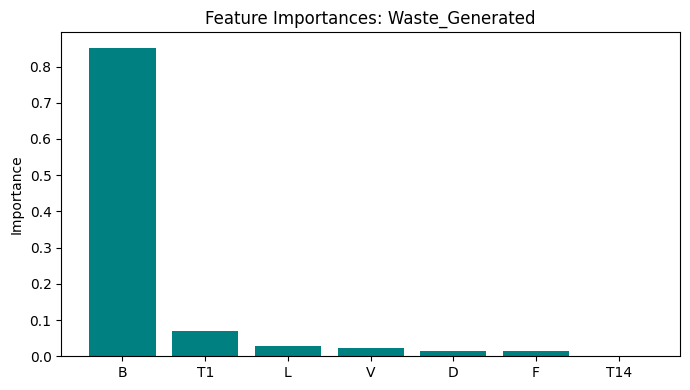


--- Random Forest Model for: Energy_Consumption ---
MAE:  30.5305
RMSE: 310.5782
R²:   1.0000


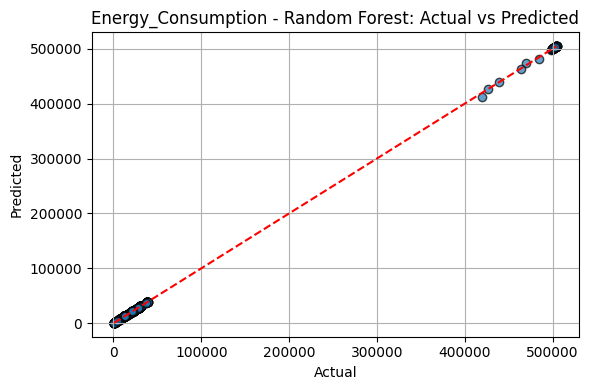

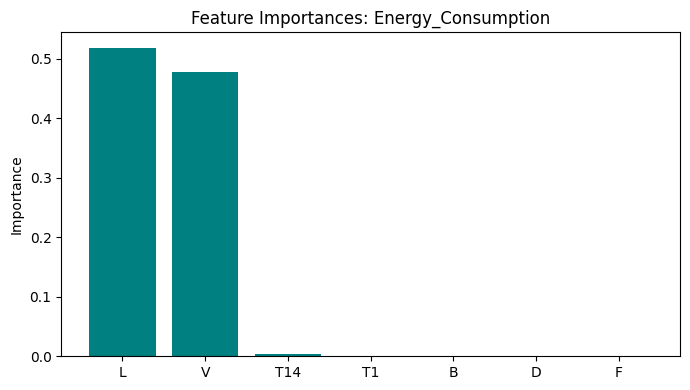

In [47]:
# Using Random Forest Model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_excel("dataset_distill.xlsx")

# --- Ensure columns are numeric and handle potential errors ---
# Convert relevant columns to numeric, coercing errors to NaN
# Add T1 and T14 to this conversion step if they aren't already
for col in ["F", "D", "B", "L", "V", "Ethanol concentration", "T1", "T14"]:
    # Added a step to explicitly handle potential list-like structures
    # by converting to string first, removing potential list brackets and quotes,
    # then converting to numeric. This is a safeguard.
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(r'[\[\]\']', '', regex=True).str.strip(), errors='coerce')


# Fill missing values after conversion for relevant columns
# Fill missing values for T1, T14, V, L as they are used in feature engineering
df["T1"].fillna(df["T1"].median(), inplace=True)
df["T14"].fillna(df["T14"].median(), inplace=True)
df["V"].fillna(df["V"].median(), inplace=True)
df["L"].fillna(df["L"].median(), inplace=True)
df["F"].fillna(df["F"].median(), inplace=True) # Also fill F, D, B for feature engineering
df["D"].fillna(df["D"].median(), inplace=True)
df["B"].fillna(df["B"].median(), inplace=True)
df["Ethanol concentration"].fillna(df["Ethanol concentration"].median(), inplace=True)


# --- Feature Engineering ---
ethanol_in_feed = 0.5
# Now that T14, T1, and V should be numeric and NaNs handled, the calculation should work
# Ensure T14, T1, and V columns are explicitly selected from the df before calculating
df["Energy_Consumption"] = (df["T14"] - df["T1"]) * df["V"]
# Ensure D, Ethanol concentration, and F are explicitly selected
df["Yield"] = (df["D"] * df["Ethanol concentration"]) / df["F"]
# Ensure F, Ethanol concentration, and D are explicitly selected
df["Waste_Generated"] = df["F"] * ethanol_in_feed - df["D"] * df["Ethanol concentration"]


# Drop rows with any remaining missing values in the columns used for features and targets
# This is a final safeguard if fillna didn't cover everything, although it should now.
cols_to_check_for_nan = ["F", "D", "B", "L", "V", "T1", "T14", "Ethanol concentration", "Yield", "Waste_Generated", "Energy_Consumption"]
df.dropna(subset=cols_to_check_for_nan, inplace=True)


# Define features and targets
features = ["F", "D", "B", "L", "V", "T1", "T14"]
targets = {
    "Ethanol concentration": "Ethanol concentration",
    "Yield": "Yield",
    "Waste_Generated": "Waste_Generated",
    "Energy_Consumption": "Energy_Consumption"
}

# --- Loop for each target variable ---
for name, target in targets.items():
    print(f"\n--- Random Forest Model for: {name} ---")

    X = df[features]
    y = df[target]

    # Add checks for empty dataframes after dropping NaNs
    if X.empty or y.empty:
        print(f"Skipping model for {name} as data is empty after cleaning.")
        continue

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Add checks for empty train/test splits
    if X_train.empty or X_test.empty or y_train.empty or y_test.empty:
        print(f"Skipping model for {name} due to insufficient data after splitting.")
        continue


    # Train Random Forest Regressor
    rf = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
    rf.fit(X_train, y_train)

    # Predict
    y_pred = rf.predict(X_test)

    # Evaluation
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"MAE:  {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²:   {r2:.4f}")

    # --- Plot: Actual vs Predicted ---
    plt.figure(figsize=(6, 4))
    # Ensure plot limits are based on the actual data range
    # Use min/max of both actual and predicted to set limits
    min_val = min(y_test.min(), y_pred.min()) if not y_test.empty and not y_pred.size == 0 else 0
    max_val = max(y_test.max(), y_pred.max()) if not y_test.empty and not y_pred.size == 0 else 1
    plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
    plt.plot([min_val, max_val], [min_val, max_val], 'r--') # Ideal line
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{name} - Random Forest: Actual vs Predicted")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # --- Feature Importance ---
    importances = rf.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(7, 4))
    plt.title(f"Feature Importances: {name}")
    # Check if features list and importances are not empty
    if features and importances.size > 0:
        plt.bar([features[i] for i in indices], importances[indices], color="teal")
        plt.ylabel("Importance")
        plt.tight_layout()
        plt.show()
    else:
        print(f"No feature importances to display for {name}.")

**Random forest as the primary model**

<ipython-input-48-1905204175>:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["T1"].fillna(df["T1"].median(), inplace=True)
<ipython-input-48-1905204175>:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 


--- Random Forest Model for: Ethanol concentration ---
MAE:  0.0005
RMSE: 0.0008
R²:   0.9999


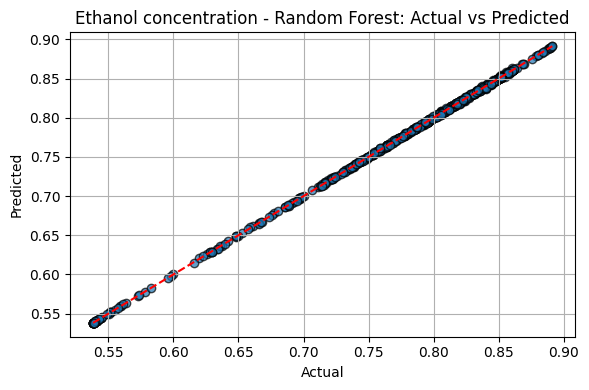

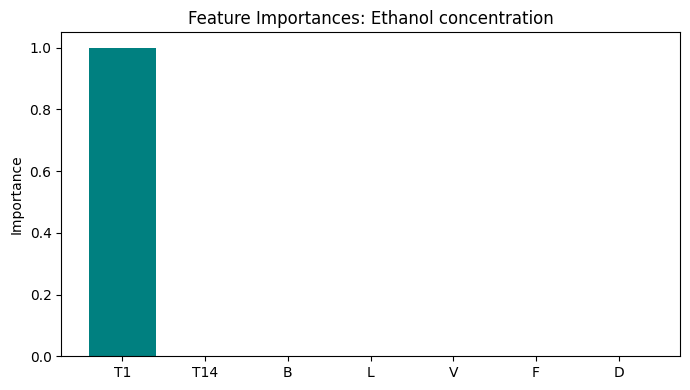


--- Random Forest Model for: Yield ---
MAE:  0.0003
RMSE: 0.0006
R²:   1.0000


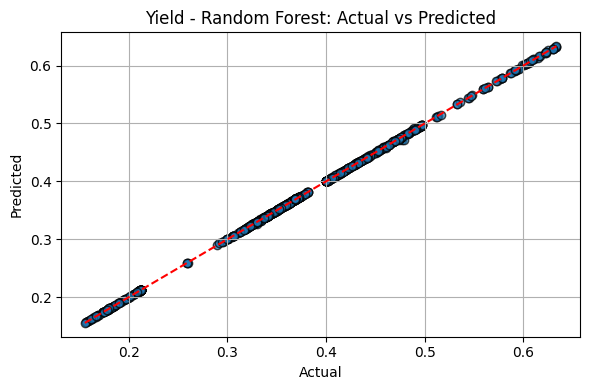

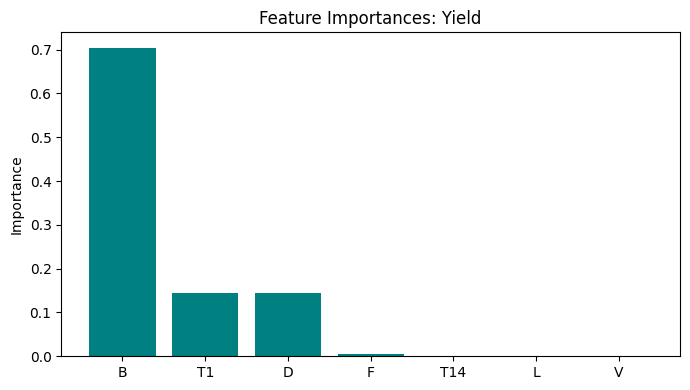


--- Random Forest Model for: Waste_Generated ---
MAE:  0.1447
RMSE: 0.3178
R²:   1.0000


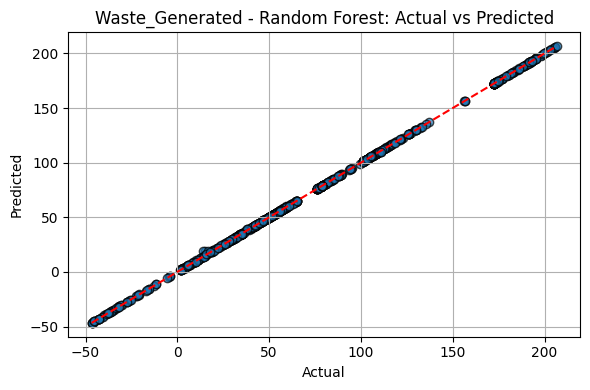

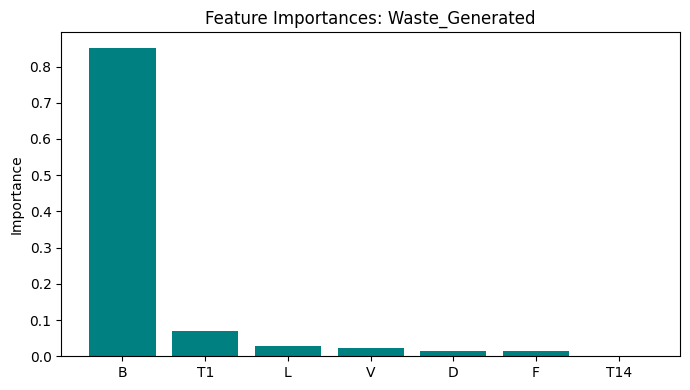


--- Random Forest Model for: Energy_Consumption ---
MAE:  30.5305
RMSE: 310.5782
R²:   1.0000


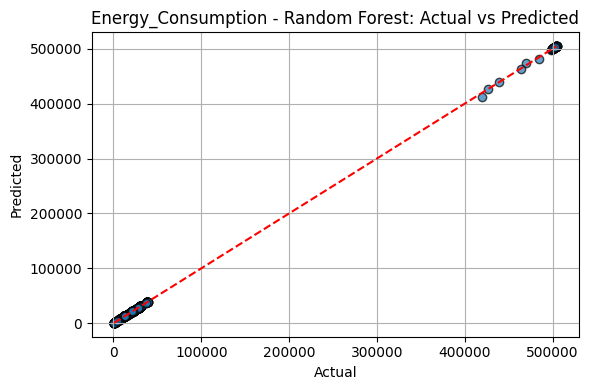

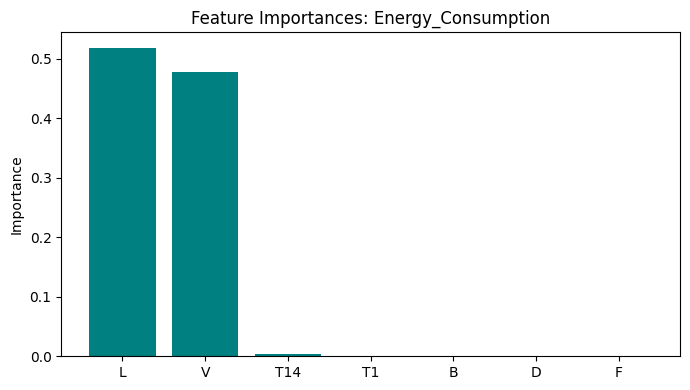

In [48]:
# Using Random Forest Model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_excel("dataset_distill.xlsx")

# --- Ensure columns are numeric and handle potential errors ---
# Convert relevant columns to numeric, coercing errors to NaN
# Add T1 and T14 to this conversion step if they aren't already
for col in ["F", "D", "B", "L", "V", "Ethanol concentration", "T1", "T14"]:
    # Added a step to explicitly handle potential list-like structures
    # by converting to string first, removing potential list brackets and quotes,
    # then converting to numeric. This is a safeguard.
    # Use errors='coerce' to turn unparseable values into NaN
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(r'[\[\]\']', '', regex=True).str.strip(), errors='coerce')


# Fill missing values after conversion for relevant columns
# Fill missing values for T1, T14, V, L as they are used in feature engineering
df["T1"].fillna(df["T1"].median(), inplace=True)
df["T14"].fillna(df["T14"].median(), inplace=True)
df["V"].fillna(df["V"].median(), inplace=True)
df["L"].fillna(df["L"].median(), inplace=True)
df["F"].fillna(df["F"].median(), inplace=True) # Also fill F, D, B for feature engineering
df["D"].fillna(df["D"].median(), inplace=True)
df["B"].fillna(df["B"].median(), inplace=True)
df["Ethanol concentration"].fillna(df["Ethanol concentration"].median(), inplace=True)

# --- Check data types after cleaning (Optional but recommended) ---
# print("Data types after cleaning:")
# print(df[["T14", "T1", "V"]].dtypes)


# --- Feature Engineering ---
ethanol_in_feed = 0.5
# Now that T14, T1, and V should be numeric and NaNs handled, the calculation should work
# Ensure T14, T1, and V columns are explicitly selected from the df before calculating
df["Energy_Consumption"] = (df["T14"] - df["T1"]) * df["V"]
# Ensure D, Ethanol concentration, and F are explicitly selected
df["Yield"] = (df["D"] * df["Ethanol concentration"]) / df["F"]
# Ensure F, Ethanol concentration, and D are explicitly selected
df["Waste_Generated"] = df["F"] * ethanol_in_feed - df["D"] * df["Ethanol concentration"]


# Drop rows with any remaining missing values in the columns used for features and targets
# This is a final safeguard if fillna didn't cover everything, although it should now.
cols_to_check_for_nan = ["F", "D", "B", "L", "V", "T1", "T14", "Ethanol concentration", "Yield", "Waste_Generated", "Energy_Consumption"]
df.dropna(subset=cols_to_check_for_nan, inplace=True)


# Define features and targets
features = ["F", "D", "B", "L", "V", "T1", "T14"]
targets = {
    "Ethanol concentration": "Ethanol concentration",
    "Yield": "Yield",
    "Waste_Generated": "Waste_Generated",
    "Energy_Consumption": "Energy_Consumption"
}

# --- Loop for each target variable ---
for name, target in targets.items():
    print(f"\n--- Random Forest Model for: {name} ---")

    X = df[features]
    y = df[target]

    # Add checks for empty dataframes after dropping NaNs
    if X.empty or y.empty:
        print(f"Skipping model for {name} as data is empty after cleaning.")
        continue

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Add checks for empty train/test splits
    if X_train.empty or X_test.empty or y_train.empty or y_test.empty:
        print(f"Skipping model for {name} due to insufficient data after splitting.")
        continue


    # Train Random Forest Regressor
    rf = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
    rf.fit(X_train, y_train)

    # Predict
    y_pred = rf.predict(X_test)

    # Evaluation
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"MAE:  {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²:   {r2:.4f}")

    # --- Plot: Actual vs Predicted ---
    plt.figure(figsize=(6, 4))
    # Ensure plot limits are based on the actual data range
    # Use min/max of both actual and predicted to set limits
    min_val = min(y_test.min(), y_pred.min()) if not y_test.empty and y_pred.size > 0 else 0
    max_val = max(y_test.max(), y_pred.max()) if not y_test.empty and y_pred.size > 0 else 1
    plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
    plt.plot([min_val, max_val], [min_val, max_val], 'r--') # Ideal line
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{name} - Random Forest: Actual vs Predicted")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # --- Feature Importance ---
    importances = rf.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(7, 4))
    plt.title(f"Feature Importances: {name}")
    # Check if features list and importances are not empty
    if features and importances.size > 0:
        plt.bar([features[i] for i in indices], importances[indices], color="teal")
        plt.ylabel("Importance")
        plt.tight_layout()
        plt.show()
    else:
        print(f"No feature importances to display for {name}.")

In [51]:
!pip install openpyxl joblib scikit-learn pandas

Saving the model

In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import joblib

# Load dataset
df = pd.read_excel("dataset_distill.xlsx")

# Clean and convert data
for col in ["F", "D", "B", "L", "V", "Ethanol concentration", "T1", "T14"]:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(r'[\[\]\']', '', regex=True).str.strip(), errors='coerce')

# Fill missing values
for col in ["T1", "T14", "V", "L", "F", "D", "B", "Ethanol concentration"]:
    df[col].fillna(df[col].median(), inplace=True)

# Feature engineering
ethanol_in_feed = 0.5
df["Energy_Consumption"] = (df["T14"] - df["T1"]) * df["V"]
df["Yield"] = (df["D"] * df["Ethanol concentration"]) / df["F"]
df["Waste_Generated"] = df["F"] * ethanol_in_feed - df["D"] * df["Ethanol concentration"]

# Drop remaining NaNs
required_columns = ["F", "D", "B", "L", "V", "T1", "T14", "Ethanol concentration", "Yield", "Waste_Generated", "Energy_Consumption"]
df.dropna(subset=required_columns, inplace=True)

# Define input features
features = ["F", "D", "B", "L", "V", "T1", "T14"]
targets = {
    "Ethanol concentration": "Ethanol concentration",
    "Yield": "Yield",
    "Waste_Generated": "Waste_Generated",
    "Energy_Consumption": "Energy_Consumption"
}

# Train and save each model
for name, target in targets.items():
    print(f"\nTraining model for: {name}")

    X = df[features].astype('float32')  # Downcast features
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Train smaller Random Forest
    rf = RandomForestRegressor(
        n_estimators=50,
        max_depth=10,
        random_state=42
    )
    rf.fit(X_train, y_train)

    # Save model with compression
    filename = f"model_{name.replace(' ', '_')}.pkl"
    joblib.dump(rf, filename, compress=3)
    print(f"Saved: {filename}")


<ipython-input-56-2538282508>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)



Training model for: Ethanol concentration
Saved: model_Ethanol_concentration.pkl

Training model for: Yield
Saved: model_Yield.pkl

Training model for: Waste_Generated
Saved: model_Waste_Generated.pkl

Training model for: Energy_Consumption
Saved: model_Energy_Consumption.pkl


In [63]:
!ls -lh model_*.pkl

-rw-r--r-- 1 root root 773K Jun 18 06:34 model_Energy_Consumption.pkl
-rw-r--r-- 1 root root 1.2M Jun 18 06:34 model_Ethanol_concentration.pkl
-rw-r--r-- 1 root root 1.4M Jun 18 06:34 model_Waste_Generated.pkl
-rw-r--r-- 1 root root 1.2M Jun 18 06:34 model_Yield.pkl


In [57]:
from google.colab import files

# Download all models
files.download("model_Ethanol_concentration.pkl")
files.download("model_Yield.pkl")
files.download("model_Waste_Generated.pkl")
files.download("model_Energy_Consumption.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Creating app.py file

In [59]:
code = '''
import streamlit as st
import numpy as np
import joblib

# Load saved models
models = {
    "Ethanol concentration": joblib.load("model_Ethanol_concentration.pkl"),
    "Yield": joblib.load("model_Yield.pkl"),
    "Waste_Generated": joblib.load("model_Waste_Generated.pkl"),
    "Energy_Consumption": joblib.load("model_Energy_Consumption.pkl"),
}

# Streamlit App UI
st.set_page_config(page_title="Distillation Process Predictor", layout="centered")
st.title("🧪 Distillation Process Predictor")

st.markdown("""
Enter the values for the operating parameters below, then select which output to predict.
""")

# Sidebar for output selection
target = st.sidebar.selectbox("Select Output to Predict", list(models.keys()))

# Input fields
with st.form("input_form"):
    F = st.number_input("Feed (F)", value=100.0)
    D = st.number_input("Distillate (D)", value=50.0)
    B = st.number_input("Bottoms (B)", value=50.0)
    L = st.number_input("Reflux (L)", value=30.0)
    V = st.number_input("Vapor (V)", value=30.0)
    T1 = st.number_input("Temperature T1 (°C)", value=80.0)
    T14 = st.number_input("Temperature T14 (°C)", value=120.0)
    submit = st.form_submit_button("Predict")

if submit:
    model = models[target]
    input_data = np.array([[F, D, B, L, V, T1, T14]])
    prediction = model.predict(input_data)[0]
    st.success(f"**Predicted {target}: {prediction:.4f}**")

'''
with open("app.py", "w") as f:
    f.write(code)

In [60]:
from google.colab import files
files.download("app.py")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Creating requirements file

In [61]:
with open("requirements.txt", "w") as f:
    f.write("streamlit\nscikit-learn\npandas\nnumpy\njoblib\nopenpyxl\nmatplotlib")

In [62]:
from google.colab import files
files.download("requirements.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>